In [1]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt
import Process_Data.constants as c
from scipy import interpolate

from Misc.analysis import format_eer_file, read_eer_file, format_eer_file_train, format_eer_file_eval
%matplotlib inline

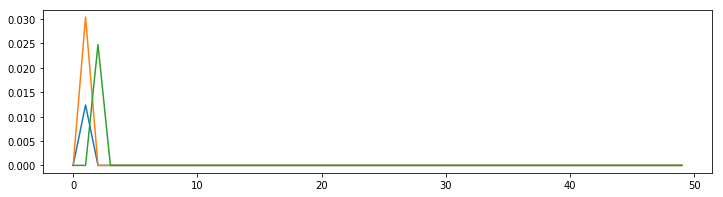

In [8]:
# Plot triangle filters
melfb = librosa.filters.mel(16000, 400)
plt.figure(figsize=(12,3))
for i,x in enumerate(melfb):
    if i<3:
        plt.plot(x[:15])

plt.show()

In [56]:
format_eer_file('data/loresnet.txt')

#|     vox1-test     |   4.19±0.08  | 0.3688±0.0158 | 0.5157±0.0103 | LoResNet-8-chn16
#|   vox1-test-mel   |   4.27±0.07  | 0.3742±0.0120 | 0.4820±0.0467 | LoResNet-8-chn16-mel
#|  vox1-test-clean  |   4.09±0.02  | 0.3620±0.0045 | 0.5199±0.0123 | LoResNet-8-chn16-clean
#|   vox1-test-aug   |   4.15±0.09  | 0.3530±0.0207 | 0.5044±0.0375 | LoResNet-8-chn16-aug
#|  vox1-test-vox2   |   4.00±0.08  | 0.3698±0.0067 | 0.4834±0.0219 | LoResNet-8-chn16-vox2
#|     vox1-test     |   3.51±0.14  | 0.3259±0.0120 | 0.4080±0.0359 | LoResNet-8-chn32
#|   vox1-test-mel   |   3.26±0.12  | 0.3195±0.0081 | 0.4053±0.0321 | LoResNet-8-chn32-mel
#|  vox1-test-clean  |   3.38±0.08  | 0.3192±0.0160 | 0.3971±0.0204 | LoResNet-8-chn32-clean
#|   vox1-test-aug   |   3.33±0.04  | 0.3177±0.0018 | 0.4027±0.0188 | LoResNet-8-chn32-aug
#|  vox1-test-vox2   |   3.37±0.08  | 0.3002±0.0029 | 0.4035±0.0423 | LoResNet-8-chn32-vox2
#|     vox1-test     |   4.19±0.06  | 0.3669±0.0166 | 0.5137±0.0044 | LoResNet-8-chn16-kd+em

In [57]:
format_eer_file('data/test_resnet_220711.log') 

#|     vox1-test     |   5.16±0.07  | 0.4481±0.0179 | 0.6074±0.0292 | ResNet-8-chn16
#|     vox1-test     |   5.12±0.10  | 0.4621±0.0071 | 0.5449±0.0284 | ResNet-8-chn16-attention(rclean)-vox1
#|  vox1-test-rcle   |   5.16±0.02  | 0.4637±0.0093 | 0.5872±0.0136 | chn16-attention3(rclean)-vox1
#|  vox1-test-vox2   |   5.14±0.03  | 0.4767±0.0115 | 0.6072±0.0224 | ResNet-8-chn16-attention(vox2_rclean)-vox1
#|     sitw-test     |   9.69±0.20  | 0.6813±0.0016 | 0.8779±0.0069 | ResNet-8-chn16-attention(rclean)-sitw
#|  sitw-test-rcle   |   9.47±0.17  | 0.6814±0.0082 | 0.8835±0.0187 | ResNet-8-chn16-attention3(rclean)-sitw
#|  sitw-test-vox2   |   9.53±0.11  | 0.6822±0.0101 | 0.8696±0.0194 | ResNet-8-chn16-attention(vox2_rclean)-sitw
#|     vox1-test     |   4.31±0.05  | 0.4005±0.0137 | 0.4999±0.0095 | ResNet-8-chn32
#|     vox1-test     |   4.01±0.06  | 0.3653±0.0092 | 0.4315±0.0262 | ResNet-8-chn64
#|     vox1-test     |   4.24±0.07  | 0.3889±0.0162 | 0.5185±0.0525 | ResNet-10
#|  vox1-test-

In [58]:
format_eer_file('data/test_resnet_sitw_20220713.txt')

#|     sitw-test     |   9.84±0.04  | 0.6933±0.0020 | 0.8924±0.0067 | ResNet-8-chn16
#|     sitw-test     |   8.40±0.11  | 0.6035±0.0068 | 0.7976±0.0112 | ResNet-8-chn32
#|     sitw-test     |   7.97±0.27  | 0.5486±0.0070 | 0.7329±0.0127 | ResNet-8-chn64
#|     sitw-test     |   8.24±0.17  | 0.5871±0.0075 | 0.7768±0.0057 | ResNet-10
#|     sitw-test     |   6.97±0.17  | 0.5203±0.0099 | 0.7152±0.0083 | ResNet-18
#|     sitw-test     |   6.27±0.09  | 0.4681±0.0061 | 0.6555±0.0072 | ResNet-34


In [59]:
format_eer_file('data/tdnn_slimmable.txt')

#|     vox1-test     |   4.73±0.05  | 0.4881±0.0154 | 0.5986±0.0136 | TDNN_v5-vox1-klfb40
#|     vox1-test     |   5.01±0.10  | 0.5041±0.0418 | 0.6068±0.0700 | SlimmableTDNN-1.0-vox1-klfb40
#|     vox1-test     |   5.00±0.16  | 0.4716±0.0230 | 0.5766±0.0314 | SlimmableTDNN-0.75-vox1-klfb40
#|     vox1-test     |   4.93±0.14  | 0.4987±0.0354 | 0.6291±0.0250 | SlimmableTDNN-0.5-vox1-klfb40
#|     vox1-test     |   5.44±0.22  | 0.5182±0.0244 | 0.6418±0.0057 | SlimmableTDNN-0.25-vox1-klfb40


In [60]:
format_eer_file('data/lores_es.txt')

#|     vox1-test     |   3.31±0.12  | 0.3185±0.0173 | 0.4072±0.0169 | LoResNet-8-chn64


In [61]:
# print(result_lst[0], result_lst[-1])
eval_str = ['EER', 'MinDCF08', 'MinDCF10']
set_sets = ['v1', 'sitw']

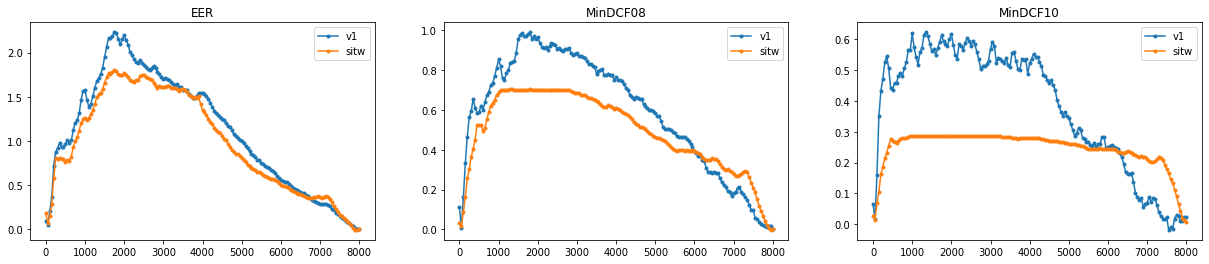

In [83]:
result_idx, result_lst = read_eer_file('data/freq_mask.txt')

# baseline ResNet-34-avg5-vox1 klsp
norm_eer = np.array([4.24, 0.3889, 0.5185])
norm_sitw_eer = np.array([8.24, 0.5871, 0.7768])

x = np.arange(161) * 8000 / (161 - 1)

plt.figure(figsize=(21, 4))
for i in range(3):
    plt.subplot(1,3,int(i+1))
    
    plt.title(eval_str[i])
    eer_lift = (result_lst[:161, i]-norm_eer[i])/norm_eer[i]
    plt.plot(x, eer_lift, marker = '.')
    
    eer_lift = (result_lst[161:, i]-norm_sitw_eer[i])/norm_sitw_eer[i]
    plt.plot(x, eer_lift, marker = '.')
    
    plt.legend(set_sets)

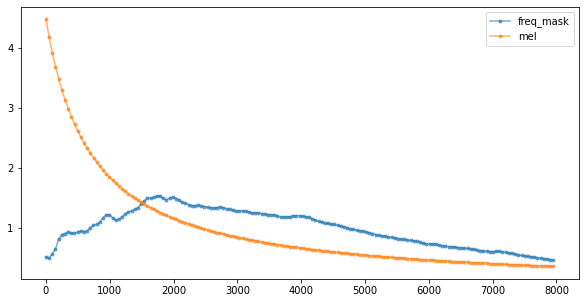

In [91]:
perb_weight = result_lst[:161, 0]
perb_weight /= perb_weight.mean()

input_dim=len(perb_weight)

m = np.arange(0, 2840.0230467083188)
m = 700 * (10 ** (m / 2595.0) - 1)
n = np.array([1/(m[i] - m[i - 1]) for i in range(1, len(m))])
# x = np.arange(input_dim) * 8000 / (input_dim - 1)  # [0-8000]
f = interpolate.interp1d(m[1:], n)
xnew = np.arange(np.min(m[1:]), np.max(
    m[1:]), (np.max(m[1:]) - np.min(m[1:])) / input_dim)
ynew = f(xnew)

plt.figure(figsize=(10,5))

plt.plot(np.arange(input_dim)/input_dim*8000,  perb_weight, marker='.', alpha=0.6)
plt.plot(xnew, ynew/ynew.mean(), marker='.', alpha=0.6)

plt.legend(['freq_mask', 'mel'])

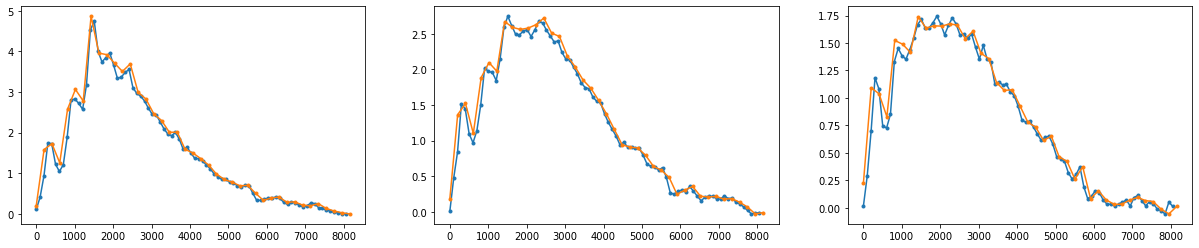

In [70]:
plt.figure(figsize=(21, 4))

# baseline ResNet-34-avg5-vox2 klsp
#|     vox1-test     |  2.08±0.09  |             | 0.1965±0.0011 | 0.3089±0.0059 |
norm_eer = np.array([2.08, 0.1965, 0.3089])
#|     sitw-test     |  3.27±0.13  |             | 0.2661±0.0100 | 0.4016±0.0047 |
norm_sitw_eer = np.array([3.27, 0.2661, 0.4016])

for mask_len in [2, 4]:
    result_idx, result_lst = read_eer_file('data/freq_mask%d.txt'%mask_len)
    x = np.arange(161/mask_len) * 8000 / (161/mask_len - 1)
    
    for i in range(3):
        plt.subplot(1, 3, int(i+1))
        # plt.title(eval_str[i])
        eer_lift = (result_lst[:161, i]-norm_eer[i])/norm_eer[i]
        plt.plot(x, eer_lift, marker = '.')

In [ ]:
perb_weight = result_lst[:161, 0]
perb_weight /= perb_weight.sum()

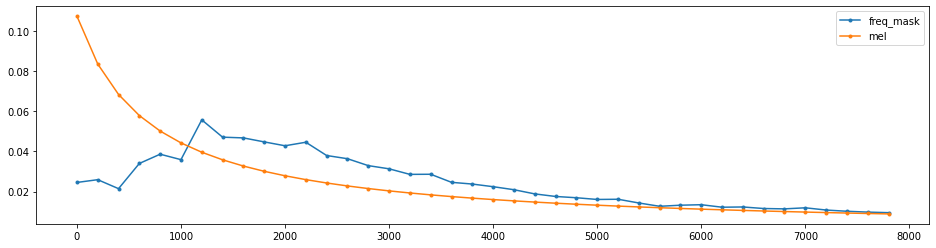

In [82]:
from scipy import interpolate
input_dim=40

m = np.arange(0, 2840.0230467083188)
m = 700 * (10 ** (m / 2595.0) - 1)
n = np.array([1/(m[i] - m[i - 1]) for i in range(1, len(m))])
# x = np.arange(input_dim) * 8000 / (input_dim - 1)  # [0-8000]
f = interpolate.interp1d(m[1:], n)
xnew = np.arange(np.min(m[1:]), np.max(
    m[1:]), (np.max(m[1:]) - np.min(m[1:])) / input_dim)
ynew = f(xnew)

plt.figure(figsize=(16,4))

plt.plot(np.arange(40)/40*8000,  perb_weight[1:], marker='.')
plt.plot(xnew, ynew/ynew.sum(), marker='.')

plt.legend(['freq_mask', 'mel'])

In [64]:
format_eer_file('data/resnet_fb40.txt')

#|     vox1-test     |   3.60±0.06  | 0.3696±0.0070 | 0.5131±0.0304 | ResNet-50-chn16
#|     vox1-test     |   3.66±0.08  | 0.3703±0.0248 | 0.4460±0.0231 | ResNet-34-chn16
#|     vox1-test     |   3.89±0.05  | 0.3967±0.0145 | 0.4850±0.0160 | ResNet-18-chn16
#|     vox1-test     |   4.25±0.10  | 0.3914±0.0040 | 0.5287±0.0207 | ResNet-10-chn16


In [65]:
format_eer_file('data/aidata.txt')

#|    aidata-test    |   5.33±0.14  | 0.4665±0.0047 | 0.7887±0.0031 | resnet18_seblcok_red2_astp2-wav-fb40-baseline
#|    aidata-test    |   5.86±0.13  | 0.4554±0.0058 | 0.7793±0.0189 | resnet18_seblcok_red2_astp2-wav-fb40-mixup0_0.2
#|    aidata-test    |   5.23±0.16  | 0.4232±0.0072 | 0.7721±0.0056 | resnet18_seblcok_red2_astp2-wav-fb40-clean+half_mixup0_0.2
#|    aidata-test    |   5.14±0.02  | 0.4364±0.0147 | 0.7679±0.0181 | resnet18_seblcok_red2_astp2-wav-fb40-clean+half_mixup0_0.5
#|    aidata-test    |   5.10±0.05  | 0.4776±0.0072 | 0.8081±0.0163 | resnet34_seblcok_red2_k3_astp2-fb40-baseline-server
#|    aidata-test    |   5.62±0.11  | 0.4920±0.0089 | 0.8166±0.0216 | resnet34_seblcok_red2_k3_astp2-fb40-clean+half_mixup0_0.2
#|    aidata-test    |  14.07±11.67  | 0.6608±0.2378 | 0.8756±0.0876 | resnet34_seblcok_red2_k3_astp2-fb40-clean+half_mixup0_0.5
#|    aidata-test    |  20.70±10.64  | 0.8335±0.2329 | 0.9335±0.0931 | resnet34_seblcok_red2_k3_astp2-fb40-clean+half_mixup0_1
#|

In [60]:
format_eer_file('data/resnet_klsp.txt')

# baseline resnet 10: 2.15897
# attention amel :    2.003474
# attention mel :     1.969065  ==>> attention with weight make performance better

#|     vox1-test     |   2.08±0.09  | 0.1965±0.0011 | 0.3089±0.0059 | ResNet34-teacher-Mean_batch256_basic_downk1_avg5_SAP2_em256_dp01_alpha0_none1_wde5_var
#|     vox1-test     |   3.75±0.04  | 0.3624±0.0090 | 0.4668±0.0187 | ResNet18-baseline-batch128_basic_downk1_avg4_SAP2_em256_dp01_alpha0_none1
#|     vox1-test     |   3.59±0.03  | 0.3571±0.0121 | 0.4826±0.0274 | attention-mel_mean
#|     vox1-test     |   3.70±0.08  | 0.3426±0.0203 | 0.4623±0.0587 | ResNet18-baseline-mix2
#|     vox1-test     |   3.55±0.02  | 0.3497±0.0070 | 0.4450±0.0365 | attention-amel_mean-mix2
#|     vox1-test     |   3.73±0.08  | 0.3532±0.0177 | 0.4486±0.0195 | attention-v2_rclean_gax-mix2
#|     vox1-test     |   3.58±0.12  | 0.3414±0.0088 | 0.4582±0.0248 | attention-v2_rclean_gean-mix2
#|     vox1-test     |   4.18±0.07  | 0.4039±0.0090 | 0.5165±0.0224 | ResNet10-baseline-mix2
#|   cnceleb-test    |  15.62±0.31  | 0.7659±0.0055 | 0.9390±0.0081 | ResNet10-baseline-mix2
#|   aishell2-test   |   9.29±0.18  |

In [61]:
x = ['vox1', 'aishell2']#, 'cnceleb', 'magic']

with open('data/aidata_types.txt' , 'r') as f:
    
    model_dict = {}
    for l in f.readlines(): #|     vox1-test     |   4.18±0.07  | 0.4039±0.0090 | 0.5165±0.0224 | ResNet10-baseline-mix2
        lst = l.split()
        set_name = lst[1].split('-')[0]
        eer = lst[3].split('±')[0]
        dcf08 = lst[5].split('±')[0]
        dcf10 = lst[7].split('±')[0]
        model_name = lst[-1]
        
        if model_name not in model_dict:
            model_dict[model_name] = {}
        
        model_dict[model_name][set_name] = [float(eer), float(dcf08), float(dcf10)]

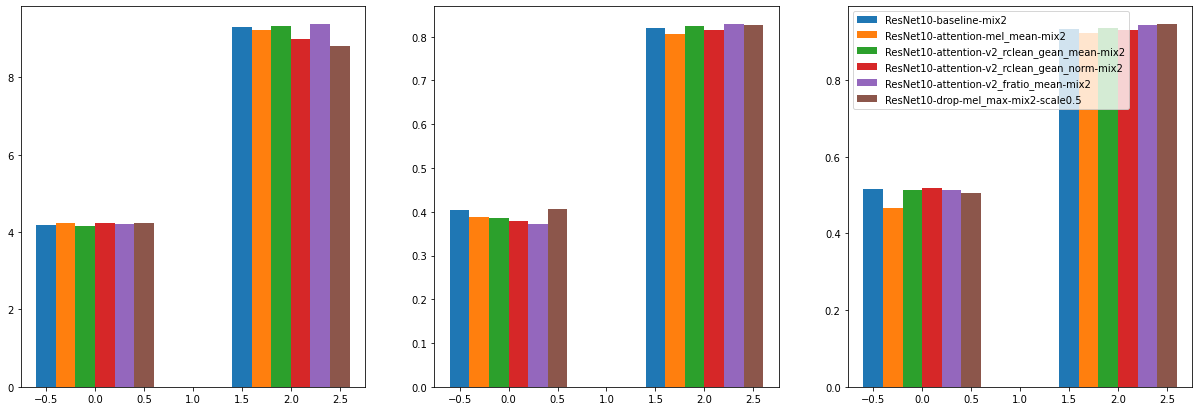

In [101]:
plt.figure(figsize=(21, 7))

model_names = []
x = ['vox1', 'aishell2']#, 'cnceleb']#, 'magic']
x_dict = {'vox1': 0, 'aishell2': 2, 'cnceleb': 4, 'magic': 6}
# x = ['aishell2']#, 'cnceleb']#, 'magic']

for m_name in model_dict:
    model_names.append(m_name)
    sets = model_dict[m_name]
    if m_name in plot_model_names:
        for i in range(3):
            plt.subplot(1, 3, int(i+1))
            plt.bar([x_dict[i]+model_offset[m_name] for i in x], [sets[s][i] for s in x], width=0.2)
    
plt.legend(plot_model_names)
# attention v2_rclean_gean norm should be better one.

In [64]:
plot_model_names = ['ResNet10-baseline-mix2',
 'ResNet10-attention-mel_mean-mix2',
 'ResNet10-attention-v2_rclean_gean_mean-mix2',
 'ResNet10-attention-v2_rclean_gean_norm-mix2',
 'ResNet10-attention-v2_fratio_mean-mix2',
 'ResNet10-drop-mel_max-mix2-scale0.5']

In [94]:
plot_model_names_offset = np.arange(0, 1+1/(len(plot_model_names)-1), 1/(len(plot_model_names)-1))
plot_model_names_offset -= plot_model_names_offset.mean()
plot_model_names_offset *= 1

model_offset = {}
for i,j in zip(plot_model_names, plot_model_names_offset):
    model_offset[i] = j

In [95]:
model_offset

{'ResNet10-baseline-mix2': -0.5,
 'ResNet10-attention-mel_mean-mix2': -0.3,
 'ResNet10-attention-v2_rclean_gean_mean-mix2': -0.09999999999999998,
 'ResNet10-attention-v2_rclean_gean_norm-mix2': 0.10000000000000009,
 'ResNet10-attention-v2_fratio_mean-mix2': 0.30000000000000004,
 'ResNet10-drop-mel_max-mix2-scale0.5': 0.5}

In [67]:
format_eer_file('data/resnet_fb40_at.txt')

#|     vox1-test     |   3.66±0.08  | 0.3703±0.0248 | 0.4460±0.0231 | batch256_seblock_red2_downk3_avg5_ASTP2_em256_dp01_alpha0_none1_wd5e4_vares
#|     vox1-test     |   3.53±0.06  | 0.3544±0.0158 | 0.4628±0.0317 | batch128_seblock_red2_downk3_avg5_ASTP2_em256_dp01_alpha0_none1_chn32_wd5e4_varesmix2_bashuf2_dist
#|     vox1-test     |   4.25±0.10  | 0.3914±0.0040 | 0.5287±0.0207 | ResNet-10-chn16-baseline
#|     vox1-test     |   4.05±0.04  | 0.3961±0.0076 | 0.4839±0.0299 | ResNet-10-chn16-Student-attention_transfer-1000
#|     vox1-test     |   4.09±0.05  | 0.3876±0.0100 | 0.5330±0.0131 | ResNet-10-chn16-Student-attention_transfer-1000-frequency
#|     vox1-test     |   4.26±0.04  | 0.4033±0.0139 | 0.4873±0.0125 | ResNet-10-chn16-Student-attention_transfer-1000-time
#|     vox1-test     |   3.89±0.05  | 0.3967±0.0145 | 0.4850±0.0160 | ResNet-18-chn16-baseline


In [68]:
format_eer_file('data/resnet_fb80.txt')

#|     vox1-test     |   4.16±0.08  | 0.3981±0.0078 | 0.4637±0.0178 | resnet10-seblock-kernel7,7
#|     vox1-test     |   3.39±0.12  | 0.3470±0.0116 | 0.4240±0.0195 | resnet34-seblock-kernel7,7


In [3]:
format_eer_file('data/vox2_ecapa.txt')

#|     vox1-test     |   2.04±0.07  | 0.2173±0.0054 | 0.3082±0.0339 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist
#|     sitw-test     |   3.51±0.13  | 0.3003±0.0112 | 0.4495±0.0121 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist
#|     vox1-test     |   1.98±0.06  | 0.2063±0.0110 | 0.3055±0.0407 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist-manifold-[1,2]
#|     sitw-test     |   3.23±0.03  | 0.2905±0.0063 | 0.4470±0.0074 | ECAPA-klfb40-vox2-Mean_batch256_SASP2_em192_wde5_2sesmix2_dist-manifold-[1,2]
#|     vox1-test     |   1.78±0.07  | 0.1794±0.0090 | 0.2871±0.0287 | ECAPA-wave-fb80-vox2-Mean_batch128_SASP2_em192_wde5_2sesmix2_dist
#|     sitw-test     |   3.08±0.13  | 0.2794±0.0077 | 0.4376±0.0193 | ECAPA-wave-fb80-vox2-Mean_batch128_SASP2_em192_wde5_2sesmix2_dist


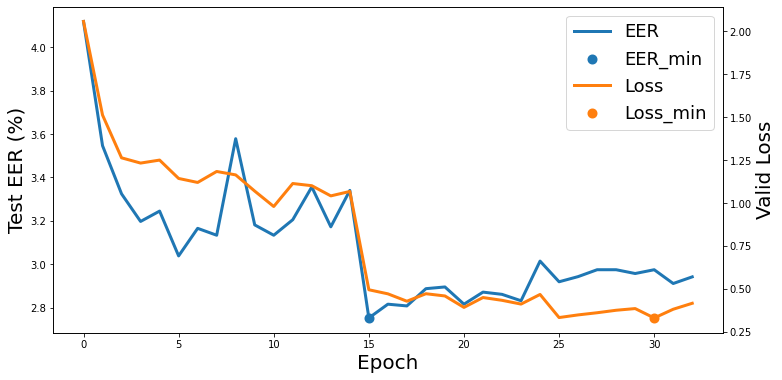

In [130]:
with open('data/v2_tdnn.txt', 'r') as f:
    EER = []
    Valid_loss = []
    for l in f.readlines():
        if 'EER' in l:
            EER.append(float(l.split()[2].rstrip('%,')))
        
        if 'Valid' in l:
            Valid_loss.append(float(l.split()[-1].rstrip('.')))

cs = [u'b', u'g', u'r', u'c', u'm', u'y', u'k']
# plt.figure(figsize=(12, 6))
fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax1.plot(EER, c='C0', linewidth=3)
ax1.scatter([15], [2.7519], linewidth=4)
ax1.set_ylabel('Test EER (%)', fontsize=20)
ax1.set_xlabel('Epoch', fontsize=20)
# ax1.legend('EER')

ax2 = ax1.twinx()
ax2.plot(Valid_loss, c='C1', linewidth=3)
ax2.scatter([30], [0.330426], c='C1', linewidth=4)

ax2.set_ylabel('Valid Loss', fontsize=20)
fig.legend(['EER', 'EER_min', 'Loss', 'Loss_min'], fontsize=18, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

Text(0.5, 0, 'Epoch')

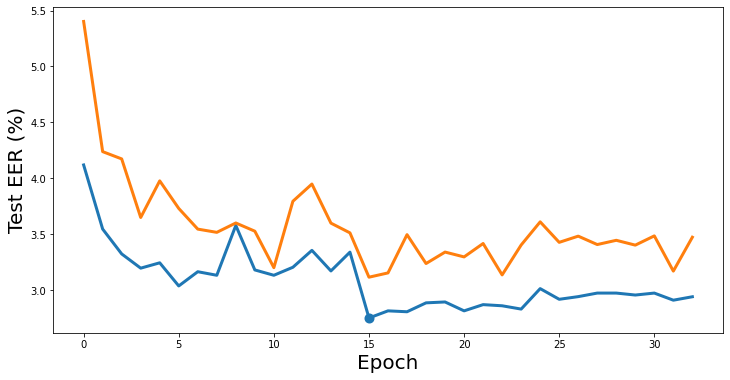

In [7]:
with open('data/v2_tdnn.txt', 'r') as f:
    EER = []
    MinDCF10 = []
    for l in f.readlines():
        if 'EER' in l:
            EER.append(float(l.split()[2].rstrip('%,')))
            MinDCF10.append(float(l.split()[8].rstrip(',')))
        
        # if 'Valid' in l:
        #     Valid_loss.append(float(l.split()[-1].rstrip('.')))

cs = [u'b', u'g', u'r', u'c', u'm', u'y', u'k']
# plt.figure(figsize=(12, 6))

linear = (np.array(EER) + 10 * np.array(MinDCF10))/2 

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax1.plot(EER, c='C0', linewidth=3)
ax1.plot(linear, c='C1', linewidth=3)

ax1.scatter([15], [2.7519], linewidth=4)
ax1.set_ylabel('Test EER (%)', fontsize=20)
ax1.set_xlabel('Epoch', fontsize=20)
# ax1.legend('EER')

# ax2 = ax1.twinx()
# ax2.plot(Valid_loss, c='C1', linewidth=3)
# ax2.scatter([30], [0.330426], c='C1', linewidth=4)

# ax2.set_ylabel('Valid Loss', fontsize=20)
# fig.legend(['EER', 'EER_min', 'Loss', 'Loss_min'], fontsize=18, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

In [13]:
linear = (np.array(EER) + 10 * np.array(MinDCF10))/2 
multi = np.array(EER) * np.array(MinDCF10)

In [15]:
for max_idx in np.argsort(linear)[:8]:
    print(EER[max_idx], MinDCF10[max_idx])

2.7519 0.3481
2.8609 0.3413
2.8155 0.3494
2.9109 0.3431
3.1336 0.327
2.8871 0.359
2.8155 0.378
2.895 0.3787


In [16]:
for max_idx in np.argsort(multi)[:8]:
    print(EER[max_idx], MinDCF10[max_idx])

2.7519 0.3481
2.8609 0.3413
2.8155 0.3494
2.9109 0.3431
3.1336 0.327
2.8871 0.359
2.8155 0.378
2.895 0.3787


Text(0.5, 0, 'Epoch')

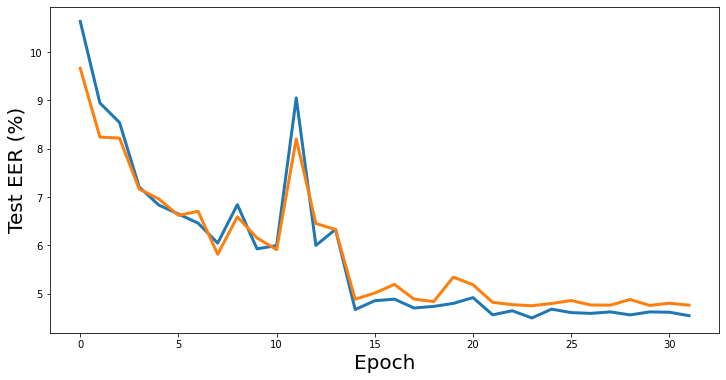

In [18]:
with open('data/klsp_train.txt', 'r') as f:
    EER = []
    MinDCF10 = []
    for l in f.readlines():
        if 'EER' in l:
            EER.append(float(l.split()[2].rstrip('%,')))
            MinDCF10.append(float(l.split()[8].rstrip(',')))
        
        # if 'Valid' in l:
        #     Valid_loss.append(float(l.split()[-1].rstrip('.')))

cs = [u'b', u'g', u'r', u'c', u'm', u'y', u'k']
# plt.figure(figsize=(12, 6))

linear = (np.array(EER) + 10 * np.array(MinDCF10))/2 

fig, ax1 = plt.subplots()
fig.set_size_inches(12, 6)

ax1.plot(EER, c='C0', linewidth=3)
ax1.plot(linear, c='C1', linewidth=3)
# ax1.scatter([15], [2.7519], linewidth=4)
ax1.set_ylabel('Test EER (%)', fontsize=20)
ax1.set_xlabel('Epoch', fontsize=20)
# ax1.legend('EER')

# ax2 = ax1.twinx()
# ax2.plot(Valid_loss, c='C1', linewidth=3)
# ax2.scatter([30], [0.330426], c='C1', linewidth=4)

# ax2.set_ylabel('Valid Loss', fontsize=20)
# fig.legend(['EER', 'EER_min', 'Loss', 'Loss_min'], fontsize=18, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

In [19]:
linear = (np.array(EER) + 10 * np.array(MinDCF10))/2 
multi = np.array(EER) * np.array(MinDCF10)

In [23]:
num_max = 8
for max_eer, max_dcf in zip(np.argsort(linear)[:num_max],np.argsort(multi)[:num_max]):
    print(EER[max_eer], '/' , EER[max_dcf], ' ',   MinDCF10[max_eer], '/' , MinDCF10[max_dcf])

4.4938 / 4.4938   0.5001 / 0.5001
4.6193 / 4.6193   0.4888 / 0.4888
4.6193 / 4.5411   0.4899 / 0.4978
4.5411 / 4.6193   0.4978 / 0.4899
4.5891 / 4.5891   0.4936 / 0.4936
4.6434 / 4.6434   0.4896 / 0.4896
4.6769 / 4.6769   0.491 / 0.491
4.6129 / 4.6129   0.4985 / 0.4985


81


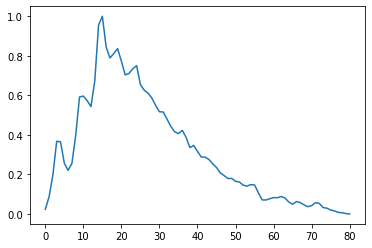

In [9]:
plt.figure(figsize=(12, 3))
plt.plot(c.V2_EER)
print(len(c.V2_EER))

In [20]:
x = np.arange(0, 8000+8000/(len(c.V2_EER)-1), 8000/(len(c.V2_EER)-1))
f = interpolate.interp1d(x, c.V2_EER)

xnew = np.arange(0, 8000+8000/160, 8000/160)
cnew = f(xnew)

In [ ]:
x = np.arange(0, 8000+8000/(len(c.V2_EER)-1), 8000/(len(c.V2_EER)-1))

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(cnew, marker='.')

In [ ]:
cnew/cnew.max()

In [4]:
format_eer_file_train('data/cnc_domain.txt')

# baseline
# + domain sample re-weight
# + kurtoses relaxtion
# + 2*kurtoses relaxtion
# + domain sample re-weight & 2*kurtoses relaxtion

#| 12.96±0.54 | 0.7102±0.0188 | 0.7475±0.0110 | 9.6844±0.4170 | 6.8717±0.1931 | ThinResNet18-cnceleb_v2-cbam_downk1_avg5_SAP2_em256_dp01_none1_wde4
#| 11.72±1.06 | 0.7040±0.0133 | 0.7493±0.0201 | 9.2360±0.8502 | 6.5291±0.6033 | domain-weight4
#| 11.94±0.61 | 0.6880±0.0032 | 0.7371±0.0104 | 9.0924±0.7958 | 6.3713±0.5809 | kurtoses
#| 11.18±0.48 | 0.6886±0.0256 | 0.7316±0.0419 | 8.8666±0.8709 | 6.1929±0.6901 | kurtoses*2
#| 11.40±0.50 | 0.6985±0.0082 | 0.7587±0.0143 | 8.8216±0.7966 | 6.1621±0.6339 | kurtoses*2-domain


In [2]:
format_eer_file_eval('data/vox1_clsaug.txt')

#| 17.26±0.18 | 0.9252±0.0124 | 0.9429±0.0131 | 16.2697±0.1065 | 15.0531±0.2660 | batch64_cbam_k1_avg4_SAP2_em128_dp01_alpha1_none1_wd5e4_40-baseline
#| 18.98±0.14 | 0.9323±0.0036 | 0.9499±0.0094 | 17.1476±0.8914 | 15.9298±0.9115 | mani5
#| 19.09±0.16 | 0.9321±0.0061 | 0.9549±0.0125 | 17.5071±0.9140 | 16.2828±0.9214 | mani5-lamda1.0
#| 19.28±0.13 | 0.9435±0.0073 | 0.9545±0.0119 | 17.7300±0.8889 | 16.5526±0.9421 | mani6
#| 18.88±0.21 | 0.9528±0.0045 | 0.9692±0.0104 | 17.8427±0.8311 | 16.7282±0.9209 | mani6-lamda1.0
#| 17.09±0.52 | 0.9523±0.0092 | 0.9712±0.0068 | 17.6344±0.9064 | 16.5740±0.9282 | mani7
#| 17.32±0.43 | 0.9485±0.0078 | 0.9690±0.0091 | 17.5122±0.8979 | 16.4800±0.9030 | mani7-lamda1.0
#| 17.81±0.26 | 0.9586±0.0020 | 0.9644±0.0101 | 17.4706±0.8554 | 16.4787±0.8534 | mani8
#| 17.76±0.49 | 0.9528±0.0032 | 0.9610±0.0065 | 17.4266±0.8346 | 16.4555±0.8262 | mani8-lamda1.0
